In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Converting 28x28 images into 1D vectors of size 784
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test  = x_test.reshape(x_test.shape[0], -1) / 255.0
print("Reshaped training data:", x_train.shape)
print("Reshaped test data:", x_test.shape)



Reshaped training data: (60000, 784)
Reshaped test data: (10000, 784)


In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/Users/prateekrai/Desktop/DL/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9266 - loss: 0.2508 - val_accuracy: 0.9675 - val_loss: 0.1118
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9673 - loss: 0.1063 - val_accuracy: 0.9697 - val_loss: 0.0960
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.9766 - loss: 0.0755 - val_accuracy: 0.9757 - val_loss: 0.0830
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.9757 - val_loss: 0.0862
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.9860 - loss: 0.0434 - val_accuracy: 0.9808 - val_loss: 0.0760
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.9882 - loss: 0.0346 - val_accuracy: 0.9777 - val_loss: 0.0851
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.9902 - loss: 0.0302 - val_accuracy: 0.9818 - val_loss: 0.0705
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9921 - l

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9782 - loss: 0.0931
Test Accuracy: 0.9782000184059143


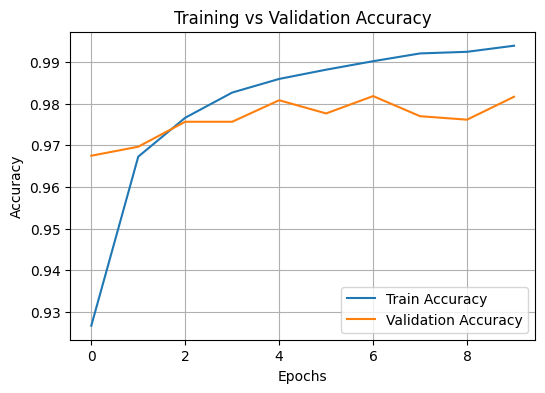

In [9]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.grid(True)
plt.show()


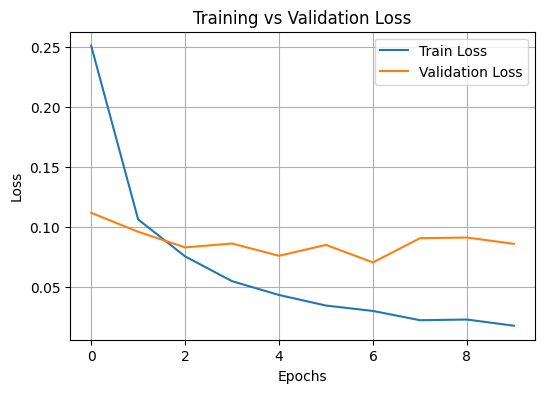

In [10]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.grid(True)
plt.show()


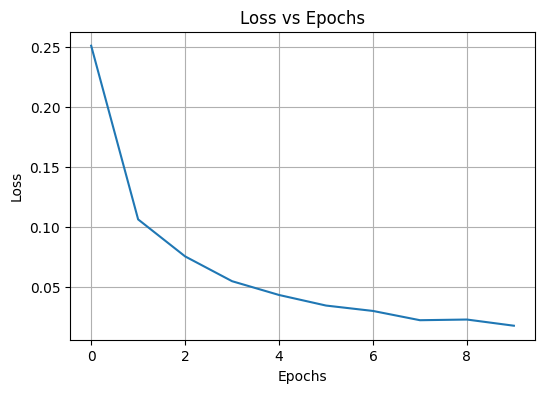

In [11]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Observation:

After inspecting the dataset shape (60000, 28, 28), the images were reshaped
into 784-dimensional vectors before being fed into the MLP.

The model achieved approximately 97–98% test accuracy on the MNIST dataset.
Training and validation accuracy curves increase steadily and saturate after
around 8–10 epochs, indicating good convergence.

Training and validation loss curves follow a similar trend, suggesting that
the model does not suffer from significant overfitting. Increasing epochs
beyond this point yields diminishing performance improvements.
